In [1]:
####################################################################################
# Abraham Tishelman-Charny                                                         #
# 27 February 2021                                                                 #
#                                                                                  #
# The purpose of this notebook is to plot HH->WWgg DNN scores and categorize.      #
####################################################################################

In [2]:
##-- Imports 
import uproot 
import os 
from matplotlib import pyplot as plt 
import numpy as np 

In [3]:
##-- Get files with DNN score branches
direc = '/eos/user/a/atishelm/ntuples/HHWWgg_DNN/MultiClassifier/HalfSingleHTraining/'
Data_Files = ["%s/Data/%s"%(direc,file) for file in os.listdir("%s/Data/"%(direc))]
HH_Files = ["%s/Signal/%s"%(direc,file) for file in os.listdir("%s/Signal/"%(direc))]
H_Files = ["%s/Single_H/%s"%(direc,file) for file in os.listdir("%s/Single_H/"%(direc))]
bkg_Files = ["%s/Backgrounds/%s"%(direc,file) for file in os.listdir("%s/Backgrounds/"%(direc))]

fileTypes = ["Data","HH","H","bkg"]

for fileType in fileTypes:
    print("")
    print("%s Files:"%(fileType))
    exec("files = %s_Files"%(fileType))
    for f in files:
        print(f)


Data Files:
/eos/user/a/atishelm/ntuples/HHWWgg_DNN/MultiClassifier/HalfSingleHTraining//Data/Data_2016_HHWWggTag_0_MoreVars.root
/eos/user/a/atishelm/ntuples/HHWWgg_DNN/MultiClassifier/HalfSingleHTraining//Data/Data_2017_HHWWggTag_0_MoreVars.root
/eos/user/a/atishelm/ntuples/HHWWgg_DNN/MultiClassifier/HalfSingleHTraining//Data/Data_2018_HHWWggTag_0_MoreVars.root

HH Files:
/eos/user/a/atishelm/ntuples/HHWWgg_DNN/MultiClassifier/HalfSingleHTraining//Signal/GluGluToHHTo2G2Qlnu_node_cHHH1_2016_HHWWggTag_0_MoreVars.root
/eos/user/a/atishelm/ntuples/HHWWgg_DNN/MultiClassifier/HalfSingleHTraining//Signal/GluGluToHHTo2G2Qlnu_node_cHHH1_2017_HHWWggTag_0_MoreVars.root
/eos/user/a/atishelm/ntuples/HHWWgg_DNN/MultiClassifier/HalfSingleHTraining//Signal/GluGluToHHTo2G2Qlnu_node_cHHH1_2018_HHWWggTag_0_MoreVars.root

H Files:
/eos/user/a/atishelm/ntuples/HHWWgg_DNN/MultiClassifier/HalfSingleHTraining//Single_H/GluGluHToGG_2017_HHWWggTag_0_MoreVars.root
/eos/user/a/atishelm/ntuples/HHWWgg_DNN/Multi

In [4]:
##-- First plot evalDNN_HH, evalDNN_H, evalDNN_bkg for all files 
# classes = ["H"]
classes = ["HH","H","bkg"]
vars = ["evalDNN_%s"%(cl) for cl in classes]
# ol = '/eos/user/a/atishelm/www/HHWWgg/DNN/HHWWyyDNN_200Epochs-3ClassMulticlass-up_BalanceYields/plots/'
ol = '/eos/user/a/atishelm/www/HHWWgg/DNN/HHWWyyDNN_200Epochs-3ClassMulticlass_EvenSingleH_Run2_BalanceYields/plots/'


def GetTree(ur_file):
    trees = [key.decode("utf-8") for key in ur_file.keys()]
    treeName = trees[0] ##-- Taking 0th tree. Assumes one tree (or one tree with multiple partitions, so just take first name)
    tree = ur_file[treeName]
    return tree
    

In [5]:
##-- Plot three scores for each file 

for cl in classes:
    exec("class_files = %s_Files"%(cl))
    for file in class_files:
        print("file:",file)
        ur_file = uproot.open(file)
        fileEnd = file.split('/')[-1]
        fileLabel = fileEnd.split('.')[0].split('_')[0]
        for year in ["2016","2017","2018"]:
            if year in fileEnd:
                fileLabel += "_%s"%(year)
        print("fileLabel:",fileLabel)
        tree = GetTree(ur_file) ##-- Assumes one tree 
        xmin, xmax, nbins = 0, 1, 50
        MC_weights = tree['weight'].array()
        bins = np.linspace(xmin, xmax, nbins + 1)
        fig, ax = plt.subplots()
        for var in vars:
            print("Plotting variable:",var)
            var_vals = tree[var].array()
            vals_, bins_  = np.histogram(var_vals, bins, weights = MC_weights, density=True)
            maxBinVal = max(vals_)
            vals_normed = np.copy(vals_ / maxBinVal)
            plt.hist(bins[:-1], bins = bins, weights = vals_normed, histtype = 'step', label = "%s %s"%(fileLabel, var))
        plt.xlabel("evalDNN")
        plt.ylabel("Entries [A.U.]")
        plt.ylim(0,1.4)
        plt.legend()
        plt.title("evalDNN Scores")
        plt.savefig("%s/%s_evalDNN.png"%(ol, fileLabel))
        plt.savefig("%s/%s_evalDNN.pdf"%(ol, fileLabel))
        plt.close()
        
print("DONE")

file: /eos/user/a/atishelm/ntuples/HHWWgg_DNN/MultiClassifier/HalfSingleHTraining//Signal/GluGluToHHTo2G2Qlnu_node_cHHH1_2016_HHWWggTag_0_MoreVars.root
fileLabel: GluGluToHHTo2G2Qlnu_2016
Plotting variable: evalDNN_HH
Plotting variable: evalDNN_H
Plotting variable: evalDNN_bkg
file: /eos/user/a/atishelm/ntuples/HHWWgg_DNN/MultiClassifier/HalfSingleHTraining//Signal/GluGluToHHTo2G2Qlnu_node_cHHH1_2017_HHWWggTag_0_MoreVars.root
fileLabel: GluGluToHHTo2G2Qlnu_2017
Plotting variable: evalDNN_HH
Plotting variable: evalDNN_H
Plotting variable: evalDNN_bkg
file: /eos/user/a/atishelm/ntuples/HHWWgg_DNN/MultiClassifier/HalfSingleHTraining//Signal/GluGluToHHTo2G2Qlnu_node_cHHH1_2018_HHWWggTag_0_MoreVars.root
fileLabel: GluGluToHHTo2G2Qlnu_2018
Plotting variable: evalDNN_HH
Plotting variable: evalDNN_H
Plotting variable: evalDNN_bkg
file: /eos/user/a/atishelm/ntuples/HHWWgg_DNN/MultiClassifier/HalfSingleHTraining//Single_H/GluGluHToGG_2017_HHWWggTag_0_MoreVars.root
fileLabel: GluGluHToGG_2017
Plo

In [7]:
##-- Plot three scores for each file 
for cl in classes:
    exec("class_files = %s_Files"%(cl))
    for file in class_files:
        print("file:",file)
        ur_file = uproot.open(file)
        fileEnd = file.split('/')[-1]
        fileLabel = fileEnd.split('.')[0].split('_')[0]
        for year in ["2016","2017","2018"]:
            if year in fileEnd:
                fileLabel += "_%s"%(year)
        print("fileLabel:",fileLabel)        
        tree = GetTree(ur_file) ##-- Assumes one tree 
        xmin, xmax, nbins = 0, 1, 25
        evalDNN_HH = tree['evalDNN_HH'].array()
        evalDNN_H = tree['evalDNN_H'].array()
        MC_weights = tree['weight'].array()
        bins = np.linspace(xmin, xmax, nbins + 1)
        fig, ax = plt.subplots()
        h = ax.hist2d(x = evalDNN_HH, y = evalDNN_H, weights = MC_weights, density = True, bins = [bins, bins])
        fig.colorbar(h[3], ax=ax)
        plt.title(fileLabel)
        plt.xlabel("evalDNN_HH")
        plt.ylabel("evalDNN_H")
        plt.savefig("%s/evalDNN2d_%s.png"%(ol, fileLabel))
        plt.savefig("%s/evalDNN2d_%s.pdf"%(ol, fileLabel))
        plt.close()        
        
print("DONE")
        

file: /eos/user/a/atishelm/ntuples/HHWWgg_DNN/MultiClassifier/HalfSingleHTraining//Signal/GluGluToHHTo2G2Qlnu_node_cHHH1_2016_HHWWggTag_0_MoreVars.root
fileLabel: GluGluToHHTo2G2Qlnu_2016
file: /eos/user/a/atishelm/ntuples/HHWWgg_DNN/MultiClassifier/HalfSingleHTraining//Signal/GluGluToHHTo2G2Qlnu_node_cHHH1_2017_HHWWggTag_0_MoreVars.root
fileLabel: GluGluToHHTo2G2Qlnu_2017
file: /eos/user/a/atishelm/ntuples/HHWWgg_DNN/MultiClassifier/HalfSingleHTraining//Signal/GluGluToHHTo2G2Qlnu_node_cHHH1_2018_HHWWggTag_0_MoreVars.root
fileLabel: GluGluToHHTo2G2Qlnu_2018
file: /eos/user/a/atishelm/ntuples/HHWWgg_DNN/MultiClassifier/HalfSingleHTraining//Single_H/GluGluHToGG_2017_HHWWggTag_0_MoreVars.root
fileLabel: GluGluHToGG_2017
file: /eos/user/a/atishelm/ntuples/HHWWgg_DNN/MultiClassifier/HalfSingleHTraining//Single_H/GluGluHToGG_M125_2016_HHWWggTag_0_MoreVars.root
fileLabel: GluGluHToGG_2016
file: /eos/user/a/atishelm/ntuples/HHWWgg_DNN/MultiClassifier/HalfSingleHTraining//Single_H/GluGluHToGG_M

In [ ]:
##-- Plot Data sidebands and MC in sideband region 
##-- For all three scores 

In [6]:
def GetLabels(files):
    labels = []
    for file in files:
        fileEnd = file.split('/')[-1]
        fileLabel = fileEnd.split('.')[0].split('_')[0]
        for year in ["2016","2017","2018"]:
            if year in fileEnd:
                fileLabel += "_%s"%(year)
#         print("fileLabel:",fileLabel) 
        labels.append(fileLabel)
    return labels 

def GetSingleList(listOfLists):
    singleList = [item for sublist in listOfLists for item in sublist]   
    singleList = np.array(np.copy(singleList[:]))
    return singleList

def GetVariable(files, variableName, region):
    print("Getting variable %s..."%(variableName))
    variable_arrays = []
    All_MC_Weights = []
    
    for file in files:
        ur_file = uproot.open(file)
        fileEnd = file.split('/')[-1]
        fileLabel = fileEnd.split('.')[0].split('_')[0]
        for year in ["2016","2017","2018"]:
            if year in fileEnd:
                fileLabel += "_%s"%(year)
        print("fileLabel:",fileLabel)
        tree = GetTree(ur_file) ##-- Assumes one tree 
        xmin, xmax, nbins = 0, 1, 25
        CMS_hgg_mass = tree['CMS_hgg_mass'].array()
        variable = tree[variableName].array()
        MC_Weights = tree['weight'].array()

        SIGNAL_REGION_MASK = np.logical_or(CMS_hgg_mass < 115, CMS_hgg_mass > 135)
        SIDEBAND_REGION_MASK = np.logical_and(CMS_hgg_mass >= 115, CMS_hgg_mass <= 135)
        
        if("2016" in fileLabel): MC_Weights = MC_Weights * 35.9
        elif("2017" in fileLabel): MC_Weights = MC_Weights * 41.5
        elif("2018" in fileLabel): MC_Weights = MC_Weights * 59.4
            
        ##-- B/c half events taken 
        if("_odd" in file):
            print("%s: Scaling yields by 2.0"%(file))
            MC_Weights = MC_Weights * 2.0 
        
        
        if("2Qlnu" in fileLabel):
            MC_Weights = MC_Weights * 31.05 * 0.441 * 0.001

        if(region == "SB"):
            variable = variable[SIGNAL_REGION_MASK]
            MC_Weights = MC_Weights[SIGNAL_REGION_MASK]
        elif(region == "SR"):
            variable = variable[SIDEBAND_REGION_MASK]
            MC_Weights = MC_Weights[SIDEBAND_REGION_MASK]

        variable_arrays.append(variable)
        All_MC_Weights.append(MC_Weights)
    return variable_arrays, All_MC_Weights 

Getting variable evalDNN_HH...
fileLabel: DiPhotonJetsBox
fileLabel: GJet
fileLabel: TTGG
fileLabel: TTGJets
fileLabel: TTJets
fileLabel: W1JetsToLNu
fileLabel: W1JetsToLNu
fileLabel: W1JetsToLNu
fileLabel: W1JetsToLNu
fileLabel: W2JetsToLNu
fileLabel: W2JetsToLNu
fileLabel: W2JetsToLNu
fileLabel: W2JetsToLNu
fileLabel: WGGJets
fileLabel: WGJJToLNu
fileLabel: ttWJets
Getting variable evalDNN_HH...
fileLabel: Data_2016
fileLabel: Data_2017
fileLabel: Data_2018


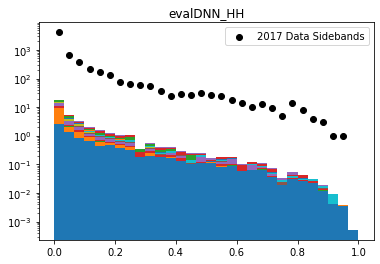

Getting variable evalDNN_H...
fileLabel: DiPhotonJetsBox
fileLabel: GJet
fileLabel: TTGG
fileLabel: TTGJets
fileLabel: TTJets
fileLabel: W1JetsToLNu
fileLabel: W1JetsToLNu
fileLabel: W1JetsToLNu
fileLabel: W1JetsToLNu
fileLabel: W2JetsToLNu
fileLabel: W2JetsToLNu
fileLabel: W2JetsToLNu
fileLabel: W2JetsToLNu
fileLabel: WGGJets
fileLabel: WGJJToLNu
fileLabel: ttWJets
Getting variable evalDNN_H...
fileLabel: Data_2016
fileLabel: Data_2017
fileLabel: Data_2018


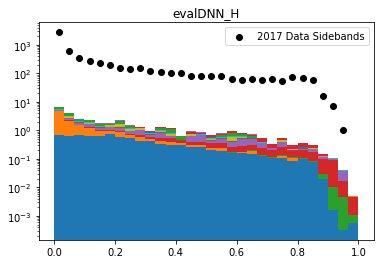

Getting variable evalDNN_bkg...
fileLabel: DiPhotonJetsBox
fileLabel: GJet
fileLabel: TTGG
fileLabel: TTGJets
fileLabel: TTJets
fileLabel: W1JetsToLNu
fileLabel: W1JetsToLNu
fileLabel: W1JetsToLNu
fileLabel: W1JetsToLNu
fileLabel: W2JetsToLNu
fileLabel: W2JetsToLNu
fileLabel: W2JetsToLNu
fileLabel: W2JetsToLNu
fileLabel: WGGJets
fileLabel: WGJJToLNu
fileLabel: ttWJets
Getting variable evalDNN_bkg...
fileLabel: Data_2016
fileLabel: Data_2017
fileLabel: Data_2018


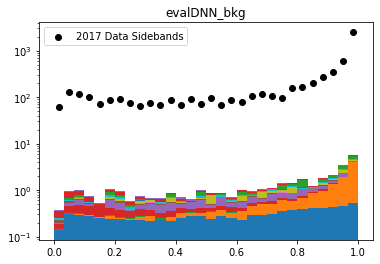

In [7]:
##-- Get arrays for each file, score 
classTypes = ["HH","H","bkg"]
        
##-- Plot 3 scores for Data / MC     
for classType in classTypes:
    evalDNN_min, evalDNN_max, evalDNN_bins = 0, 1, 30
    bins = np.linspace(evalDNN_min, evalDNN_max, evalDNN_bins + 1)
    Background_DNNscores, Background_MC_weights = GetVariable(bkg_Files, "evalDNN_%s"%(classType), "SB")  
    Data_DNNscores, Data_MC_weights = GetVariable(Data_Files, "evalDNN_%s"%(classType), "SB")
    Data_DNNscores_2017 = Data_DNNscores[1]

    ##-- just to get data bin scores
    fig, ax = plt.subplots()
    n_, bins_, _ = plt.hist(Data_DNNscores_2017, bins = bins, label = "DATA", histtype = 'step')
    plt.close()

    ##-- Plot data / mc in sidebands 
    fig, ax = plt.subplots()
    plt.hist(Background_DNNscores, bins = bins, weights = Background_MC_weights, stacked=True)
    bin_centers = [ ((bins_[i+1] - bins_[i]) / 2) + bins_[i]  for i in range(len(bins_) - 1) ]
    plt.scatter(bin_centers, n_, label = "2017 Data Sidebands", color = 'black')
    plt.title("evalDNN_%s"%(classType))
    plt.yscale('log')
    plt.legend()
    plt.show()
    plt.close()
    


Getting variable evalDNN_HH...
fileLabel: DiPhotonJetsBox
fileLabel: GJet
fileLabel: TTGG
fileLabel: TTGJets
fileLabel: TTJets
fileLabel: W1JetsToLNu
fileLabel: W1JetsToLNu
fileLabel: W1JetsToLNu
fileLabel: W1JetsToLNu
fileLabel: W2JetsToLNu
fileLabel: W2JetsToLNu
fileLabel: W2JetsToLNu
fileLabel: W2JetsToLNu
fileLabel: WGGJets
fileLabel: WGJJToLNu
fileLabel: ttWJets
Getting variable evalDNN_HH...
fileLabel: GluGluHToGG_2017
fileLabel: GluGluHToGG_2016
fileLabel: GluGluHToGG_2018
fileLabel: VBFHToGG_2017
fileLabel: VBFHToGG_2016
fileLabel: VBFHToGG_2018
fileLabel: VHToGG_2017
/eos/user/a/atishelm/ntuples/HHWWgg_DNN/MultiClassifier/HalfSingleHTraining//Single_H/VHToGG_2017_HHWWggTag_0_MoreVars_odd.root: Scaling yields by 2.0
fileLabel: VHToGG_2016
/eos/user/a/atishelm/ntuples/HHWWgg_DNN/MultiClassifier/HalfSingleHTraining//Single_H/VHToGG_M125_2016_HHWWggTag_0_MoreVars_odd.root: Scaling yields by 2.0
fileLabel: VHToGG_2018
/eos/user/a/atishelm/ntuples/HHWWgg_DNN/MultiClassifier/HalfSing

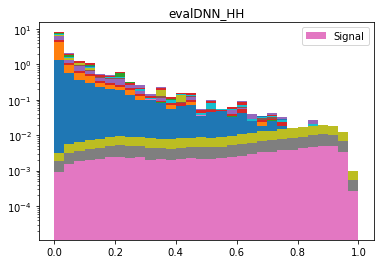

Getting variable evalDNN_H...
fileLabel: DiPhotonJetsBox
fileLabel: GJet
fileLabel: TTGG
fileLabel: TTGJets
fileLabel: TTJets
fileLabel: W1JetsToLNu
fileLabel: W1JetsToLNu
fileLabel: W1JetsToLNu
fileLabel: W1JetsToLNu
fileLabel: W2JetsToLNu
fileLabel: W2JetsToLNu
fileLabel: W2JetsToLNu
fileLabel: W2JetsToLNu
fileLabel: WGGJets
fileLabel: WGJJToLNu
fileLabel: ttWJets
Getting variable evalDNN_H...
fileLabel: GluGluHToGG_2017
fileLabel: GluGluHToGG_2016
fileLabel: GluGluHToGG_2018
fileLabel: VBFHToGG_2017
fileLabel: VBFHToGG_2016
fileLabel: VBFHToGG_2018
fileLabel: VHToGG_2017
/eos/user/a/atishelm/ntuples/HHWWgg_DNN/MultiClassifier/HalfSingleHTraining//Single_H/VHToGG_2017_HHWWggTag_0_MoreVars_odd.root: Scaling yields by 2.0
fileLabel: VHToGG_2016
/eos/user/a/atishelm/ntuples/HHWWgg_DNN/MultiClassifier/HalfSingleHTraining//Single_H/VHToGG_M125_2016_HHWWggTag_0_MoreVars_odd.root: Scaling yields by 2.0
fileLabel: VHToGG_2018
/eos/user/a/atishelm/ntuples/HHWWgg_DNN/MultiClassifier/HalfSingle

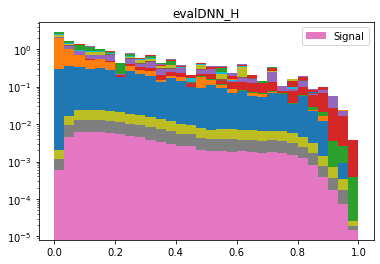

Getting variable evalDNN_bkg...
fileLabel: DiPhotonJetsBox
fileLabel: GJet
fileLabel: TTGG
fileLabel: TTGJets
fileLabel: TTJets
fileLabel: W1JetsToLNu
fileLabel: W1JetsToLNu
fileLabel: W1JetsToLNu
fileLabel: W1JetsToLNu
fileLabel: W2JetsToLNu
fileLabel: W2JetsToLNu
fileLabel: W2JetsToLNu
fileLabel: W2JetsToLNu
fileLabel: WGGJets
fileLabel: WGJJToLNu
fileLabel: ttWJets
Getting variable evalDNN_bkg...
fileLabel: GluGluHToGG_2017
fileLabel: GluGluHToGG_2016
fileLabel: GluGluHToGG_2018
fileLabel: VBFHToGG_2017
fileLabel: VBFHToGG_2016
fileLabel: VBFHToGG_2018
fileLabel: VHToGG_2017
/eos/user/a/atishelm/ntuples/HHWWgg_DNN/MultiClassifier/HalfSingleHTraining//Single_H/VHToGG_2017_HHWWggTag_0_MoreVars_odd.root: Scaling yields by 2.0
fileLabel: VHToGG_2016
/eos/user/a/atishelm/ntuples/HHWWgg_DNN/MultiClassifier/HalfSingleHTraining//Single_H/VHToGG_M125_2016_HHWWggTag_0_MoreVars_odd.root: Scaling yields by 2.0
fileLabel: VHToGG_2018
/eos/user/a/atishelm/ntuples/HHWWgg_DNN/MultiClassifier/HalfSi

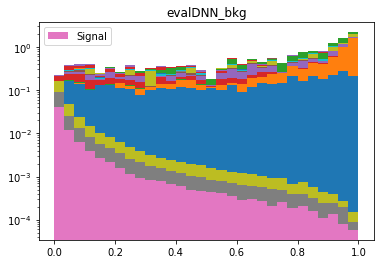

In [8]:
##-- Get arrays for each file, score 
classTypes = ["HH","H","bkg"]

#-- Plot Signal and MC in SR        
for classType in classTypes:

    Background_DNNscores_SR, Background_MC_weights_SR = GetVariable(bkg_Files, "evalDNN_%s"%(classType), "SR")
    H_DNNscores_SR, H_MC_weights_SR = GetVariable(H_Files, "evalDNN_%s"%(classType), "SR")
    Signal_DNNscores_SR, Signal_MC_weights_SR = GetVariable(HH_Files, "evalDNN_%s"%(classType), "SR")
    fig, ax = plt.subplots()
    plt.hist(Background_DNNscores_SR, bins = bins, weights = Background_MC_weights_SR, stacked=True)
    plt.hist(Signal_DNNscores_SR, bins = bins, weights = Signal_MC_weights_SR, label = "Signal", stacked = True)
    plt.title("evalDNN_%s"%(classType))
    plt.yscale('log')
    plt.legend()
    plt.show()
    plt.close()  

Getting variable CMS_hgg_mass...
fileLabel: GluGluHToGG_2017
fileLabel: GluGluHToGG_2016
fileLabel: GluGluHToGG_2018
fileLabel: VBFHToGG_2017
fileLabel: VBFHToGG_2016
fileLabel: VBFHToGG_2018
fileLabel: VHToGG_2017
/eos/user/a/atishelm/ntuples/HHWWgg_DNN/MultiClassifier/HalfSingleHTraining//Single_H/VHToGG_2017_HHWWggTag_0_MoreVars_odd.root: Scaling yields by 2.0
fileLabel: VHToGG_2016
/eos/user/a/atishelm/ntuples/HHWWgg_DNN/MultiClassifier/HalfSingleHTraining//Single_H/VHToGG_M125_2016_HHWWggTag_0_MoreVars_odd.root: Scaling yields by 2.0
fileLabel: VHToGG_2018
/eos/user/a/atishelm/ntuples/HHWWgg_DNN/MultiClassifier/HalfSingleHTraining//Single_H/VHToGG_M125_2018_HHWWggTag_0_MoreVars_odd.root: Scaling yields by 2.0
fileLabel: ttHJetToGG_2017
/eos/user/a/atishelm/ntuples/HHWWgg_DNN/MultiClassifier/HalfSingleHTraining//Single_H/ttHJetToGG_2017_HHWWggTag_0_MoreVars_odd.root: Scaling yields by 2.0
fileLabel: ttHJetToGG_2018
/eos/user/a/atishelm/ntuples/HHWWgg_DNN/MultiClassifier/HalfSingleH

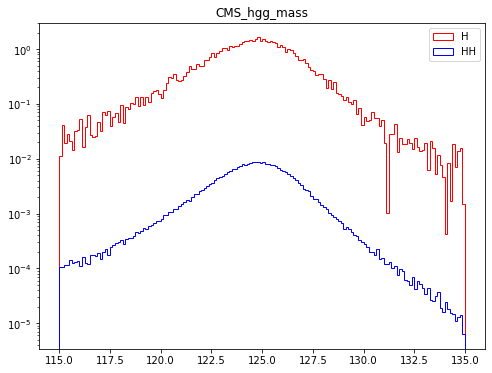

H CMS_hgg_mass INTEGRAL: 58.54270935244858
HH CMS_hgg_mass INTEGRAL: 0.3094448149204254


In [9]:
##-- Plot H and HH with no evalDNN selection

# evalDNN_min, evalDNN_max, evalDNN_bins = 0, 1, 30
# bins = np.linspace(evalDNN_min, evalDNN_max, evalDNN_bins)

mass_min, mass_max, mass_bins = 115,135,160
bins = np.linspace(mass_min, mass_max, mass_bins + 1)

# ##-- Plot CMS_hgg_mass for HH and H, with and with evalDNN cut 
H_CMS_hgg_mass_SR, H_MC_Weights_SR = GetVariable(H_Files, "CMS_hgg_mass", "SR")
HH_CMS_hgg_mass_SR, HH_MC_Weights_SR = GetVariable(HH_Files, "CMS_hgg_mass", "SR")

for C in ["H", "HH"]:
    for var in ["CMS_hgg_mass", "MC_Weights"]:
        exec("%s_%s_SR = GetSingleList(np.copy(%s_%s_SR[:]))"%(C, var, C, var))

fig, ax = plt.subplots()
fig.set_size_inches(8, 6)
plt.hist(H_CMS_hgg_mass_SR, bins = bins, weights = H_MC_Weights_SR, histtype = 'step', label = "H", color = ["red"])
plt.hist(HH_CMS_hgg_mass_SR, bins = bins, weights = HH_MC_Weights_SR, histtype = 'step', label = "HH", color = ["blue"])
plt.title("CMS_hgg_mass")
plt.yscale('log')
plt.legend()
plt.show()
plt.close()    

##-- get integrals 
fig, ax = plt.subplots()
n_, bins_, _ = plt.hist(H_CMS_hgg_mass_SR, bins = bins, weights = H_MC_Weights_SR)

print("H CMS_hgg_mass INTEGRAL:",sum(n_))

n_, bins_, _ = plt.hist(HH_CMS_hgg_mass_SR, bins = bins, weights = HH_MC_Weights_SR)
print("HH CMS_hgg_mass INTEGRAL:",sum(n_))

plt.close()

Getting variable CMS_hgg_mass...
fileLabel: GluGluHToGG_2017
fileLabel: GluGluHToGG_2016
fileLabel: GluGluHToGG_2018
fileLabel: VBFHToGG_2017
fileLabel: VBFHToGG_2016
fileLabel: VBFHToGG_2018
fileLabel: VHToGG_2017
/eos/user/a/atishelm/ntuples/HHWWgg_DNN/MultiClassifier/HalfSingleHTraining//Single_H/VHToGG_2017_HHWWggTag_0_MoreVars_odd.root: Scaling yields by 2.0
fileLabel: VHToGG_2016
/eos/user/a/atishelm/ntuples/HHWWgg_DNN/MultiClassifier/HalfSingleHTraining//Single_H/VHToGG_M125_2016_HHWWggTag_0_MoreVars_odd.root: Scaling yields by 2.0
fileLabel: VHToGG_2018
/eos/user/a/atishelm/ntuples/HHWWgg_DNN/MultiClassifier/HalfSingleHTraining//Single_H/VHToGG_M125_2018_HHWWggTag_0_MoreVars_odd.root: Scaling yields by 2.0
fileLabel: ttHJetToGG_2017
/eos/user/a/atishelm/ntuples/HHWWgg_DNN/MultiClassifier/HalfSingleHTraining//Single_H/ttHJetToGG_2017_HHWWggTag_0_MoreVars_odd.root: Scaling yields by 2.0
fileLabel: ttHJetToGG_2018
/eos/user/a/atishelm/ntuples/HHWWgg_DNN/MultiClassifier/HalfSingleH

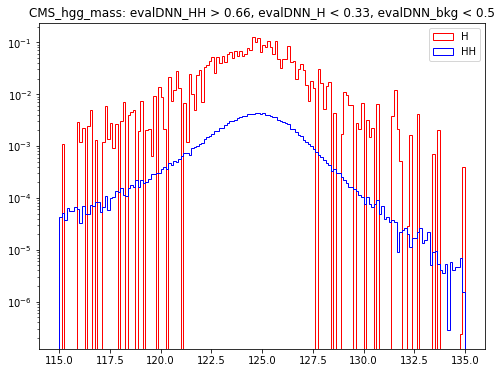

H CMS_hgg_mass INTEGRAL: 2.834640264394693
HH CMS_hgg_mass INTEGRAL: 0.14564290642738342


In [11]:
##-- HH > 0.66 
##-- H < 0.33 
##-- Bkg < 0.33 
    
HH_Thresh = 0.66
H_Thresh = 0.33
Bkg_Thresh = 0.5
    
mass_min, mass_max, mass_bins = 115,135,160
bins = np.linspace(mass_min, mass_max, mass_bins + 1)    
    
# ##-- Plot CMS_hgg_mass for HH and H, with and with evalDNN cut 
H_CMS_hgg_mass_SR, H_MC_Weights_SR = GetVariable(H_Files, "CMS_hgg_mass", "SR")
HH_CMS_hgg_mass_SR, HH_MC_Weights_SR = GetVariable(HH_Files, "CMS_hgg_mass", "SR")

H_evalDNN_HH_SR, H_MC_Weights_SR = GetVariable(H_Files, "evalDNN_HH", "SR")
HH_evalDNN_HH_SR, HH_MC_Weights_SR = GetVariable(HH_Files, "evalDNN_HH", "SR")

H_evalDNN_H_SR, H_MC_Weights_SR = GetVariable(H_Files, "evalDNN_H", "SR")
HH_evalDNN_H_SR, HH_MC_Weights_SR = GetVariable(HH_Files, "evalDNN_H", "SR")

H_evalDNN_bkg_SR, H_MC_Weights_SR = GetVariable(H_Files, "evalDNN_bkg", "SR")
HH_evalDNN_bkg_SR, HH_MC_Weights_SR = GetVariable(HH_Files, "evalDNN_bkg", "SR")

for C in ["H", "HH"]:
    for var in ["CMS_hgg_mass", "evalDNN_HH", "evalDNN_H", "evalDNN_bkg", "MC_Weights"]:
        exec("%s_%s_SR = GetSingleList(np.copy(%s_%s_SR[:]))"%(C, var, C, var))

HH_PHASESPACE_MASK_HHsamples_ = np.logical_and(HH_evalDNN_HH_SR > HH_Thresh, HH_evalDNN_H_SR < H_Thresh)
HH_PHASESPACE_MASK_Hsamples_ = np.logical_and(H_evalDNN_HH_SR > HH_Thresh, H_evalDNN_H_SR < H_Thresh)

HH_PHASESPACE_MASK_HHsamples_ = np.logical_and(HH_PHASESPACE_MASK_HHsamples_, HH_evalDNN_bkg_SR < Bkg_Thresh)
HH_PHASESPACE_MASK_Hsamples_ = np.logical_and(HH_PHASESPACE_MASK_Hsamples_, H_evalDNN_bkg_SR < Bkg_Thresh)

H_CMS_hgg_mass_SR = H_CMS_hgg_mass_SR[HH_PHASESPACE_MASK_Hsamples_]
H_MC_Weights_SR = H_MC_Weights_SR[HH_PHASESPACE_MASK_Hsamples_]

HH_CMS_hgg_mass_SR = HH_CMS_hgg_mass_SR[HH_PHASESPACE_MASK_HHsamples_]
HH_MC_Weights_SR = HH_MC_Weights_SR[HH_PHASESPACE_MASK_HHsamples_]

fig, ax = plt.subplots()
fig.set_size_inches(8, 6)
plt.hist(H_CMS_hgg_mass_SR, bins = bins, weights = H_MC_Weights_SR, histtype = 'step', label = "H", color = "red")
plt.hist(HH_CMS_hgg_mass_SR, bins = bins, weights = HH_MC_Weights_SR, histtype = 'step', label = "HH", color = "blue")
plt.title("CMS_hgg_mass: evalDNN_HH > %s, evalDNN_H < %s, evalDNN_bkg < %s"%(HH_Thresh, H_Thresh, Bkg_Thresh))
plt.yscale('log')
plt.legend()
plt.show()
plt.close()        
    
##-- get integrals 
fig, ax = plt.subplots()
n_, bins_, _ = plt.hist(H_CMS_hgg_mass_SR, bins = bins, weights = H_MC_Weights_SR)

print("H CMS_hgg_mass INTEGRAL:",sum(n_))

n_, bins_, _ = plt.hist(HH_CMS_hgg_mass_SR, bins = bins, weights = HH_MC_Weights_SR)
print("HH CMS_hgg_mass INTEGRAL:",sum(n_))

plt.close()  

Getting variable CMS_hgg_mass...
fileLabel: Data_2016
fileLabel: Data_2017
fileLabel: Data_2018
Getting variable evalDNN_HH...
fileLabel: Data_2016
fileLabel: Data_2017
fileLabel: Data_2018
Getting variable evalDNN_H...
fileLabel: Data_2016
fileLabel: Data_2017
fileLabel: Data_2018
Getting variable evalDNN_bkg...
fileLabel: Data_2016
fileLabel: Data_2017
fileLabel: Data_2018


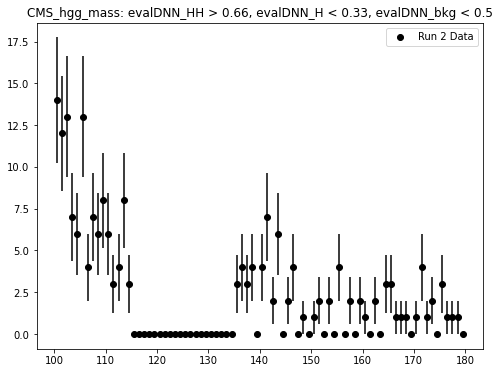

Data sidebands INTEGRAL: 193.0
DONE


In [12]:
##-- Plot Data sidebands
##-- Plot CMS_hgg_mass sidebands in HH phase space 

HH_Thresh = 0.66
H_Thresh = 0.33
Bkg_Thresh = 0.5

# mass_min, mass_max, mass_bins = 115,135,160
mass_min, mass_max, mass_bins = 100, 180, 80
bins = np.linspace(mass_min, mass_max, mass_bins + 1)

# # ##-- Plot CMS_hgg_mass for HH and H, with and with evalDNN cut 
Data_CMS_hgg_mass_SB, Data_MC_Weights_SB = GetVariable(Data_Files, "CMS_hgg_mass", "SB")
Data_evalDNN_HH_SB, Data_MC_Weights_SB = GetVariable(Data_Files, "evalDNN_HH", "SB")
Data_evalDNN_H_SB, Data_MC_Weights_SB = GetVariable(Data_Files, "evalDNN_H", "SB")
Data_evalDNN_bkg_SB, Data_MC_Weights_SB = GetVariable(Data_Files, "evalDNN_bkg", "SB")

for C in ["Data"]:
    for var in ["CMS_hgg_mass", "evalDNN_HH", "evalDNN_H", "evalDNN_bkg"]:
        exec("%s_%s_SB = GetSingleList(np.copy(%s_%s_SB[:]))"%(C, var, C, var))

HH_PHASESPACE_MASK_Datasamples_ = np.logical_and(Data_evalDNN_HH_SB > HH_Thresh, Data_evalDNN_H_SB < H_Thresh)
HH_PHASESPACE_MASK_Datasamples = np.logical_and(HH_PHASESPACE_MASK_Datasamples_, Data_evalDNN_bkg_SB < Bkg_Thresh)
Data_CMS_hgg_mass_SB = Data_CMS_hgg_mass_SB[HH_PHASESPACE_MASK_Datasamples]

##-- just to get data bin scores
fig, ax = plt.subplots()
n_, bins_, _ = plt.hist(Data_CMS_hgg_mass_SB, bins = bins, label = "DATA", histtype = 'step')
plt.close()
bin_centers = [ ((bins_[i+1] - bins_[i]) / 2) + bins_[i]  for i in range(len(bins_) - 1) ]

errors = [np.sqrt(val) for val in n_]

fig, ax = plt.subplots()
fig.set_size_inches(8, 6)
plt.scatter(bin_centers, n_, label = "Run 2 Data", color = 'black')
plt.errorbar(bin_centers, n_, yerr = errors, linestyle = '', ecolor = 'black')
plt.title("CMS_hgg_mass: evalDNN_HH > %s, evalDNN_H < %s, evalDNN_bkg < %s"%(HH_Thresh, H_Thresh, Bkg_Thresh))
plt.legend()
plt.show()
plt.close()        

print("Data sidebands INTEGRAL:",sum(n_))
print("DONE")

In [ ]:
##-- Optimize selections in 3D 
##-- 